In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import sys, os
sys.path.insert(0, os.path.abspath('..'))
os.chdir(os.path.abspath('..'))

In [2]:
from Blocks.data_loader import extrasensory_data_loader
from Blocks.filter import MisingLabelFilter,  MisingDataColumnFilter, Take
from Blocks.imputer import Imputer
from Blocks.normalizer import Normalizer
from Blocks.experimental_protocol import ExpTrainTest, ExpCV, ExpWithin
from Blocks.results_analysis import ResultsConcat, ResultsCVSummarize, ;l

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.dummy import DummyClassifier

import matplotlib.pyplot as plt

from Workflow.workflow import workflow
import Workflow.compute_graph
import time
import pandas as pd

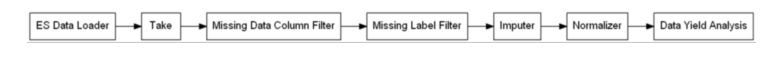

Running Scheduler sequential
  Running Sequential Scheduler

Running step ES Data Loader
  Loading Extrasensory pkl file...

Running step Take

Running step Missing Data Column Filter

Running step Missing Label Filter

Running step Imputer
  Imputer: Running on matrix of size 41622x224

Running step Normalizer
  Normalizer: running matrix of size 41622x224

Running step Data Yield Analysis


,#Individuals,#Individuals with Data,#Instances,#Labeled Instances,%Labeled Instances,#Features,#Observed Feature Values,%Observed Feature Values
Norm,60,9,41622,41622,100.0,224,9323328,100.0



  Workflow complete



In [5]:
estimators = {"LR": LogisticRegression(solver="lbfgs",max_iter=100)}

metrics   = [accuracy_score, f1_score, precision_score, recall_score]
df_raw    = extrasensory_data_loader(label="SLEEPING");
df_sub    = Take(df_raw, 50000)
df_cf     = MisingDataColumnFilter(df_sub);
df_lf     = MisingLabelFilter(df_cf);
df_imp    = Imputer(df_lf)
df_norm   = Normalizer(df_imp);
report    = DataYieldReport(df_norm, names=["Norm"])

flow      = workflow([report]);
flow.draw()
plt.show()
output    = flow.run();

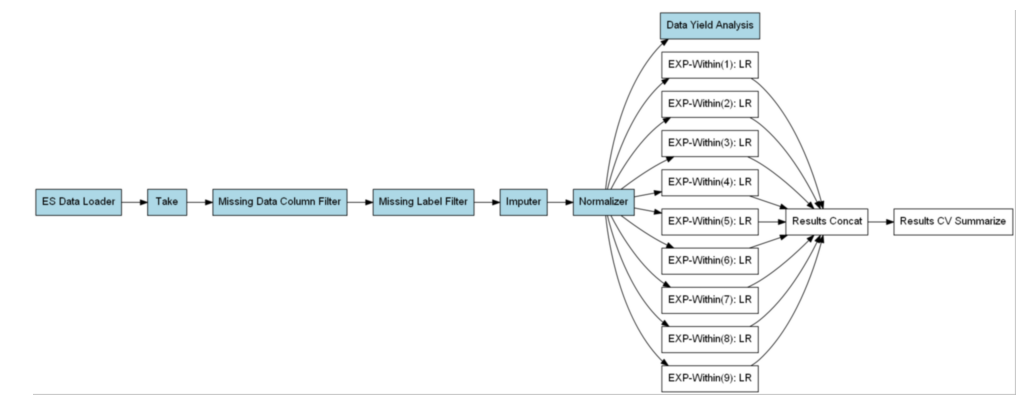

Running Scheduler sequential
  Running Sequential Scheduler

Running step EXP-Within(9): LR
  Fitting and testing LR

Running step EXP-Within(8): LR
  Fitting and testing LR

Running step EXP-Within(7): LR
  Fitting and testing LR

Running step EXP-Within(6): LR
  Fitting and testing LR

Running step EXP-Within(5): LR
  Fitting and testing LR

Running step EXP-Within(4): LR
  Fitting and testing LR

Running step EXP-Within(3): LR
  Fitting and testing LR

Running step EXP-Within(2): LR
  Fitting and testing LR

Running step EXP-Within(1): LR
  Fitting and testing LR

Running step Results Concat
  Concatenating Results


accuracy_score  f1_score  precision_score  recall_score
Method Individual                                                         
LR     1                 0.801887  0.790000         0.981366      0.661088
       2                 0.713235  0.000000         0.000000      0.000000
       3                 0.989950  0.000000         0.000000      0.000000
       4                 0.971318  0.962739         0.929961      0.997912
       5                 0.957169  0.863905         0.793478      0.948052
       6                 0.430530  0.000000         0.000000      0.000000
       7                 0.644407  0.004673         0.200000      0.002364
       8                 0.974910  0.975395         0.955250      0.996409
       9                 0.947165  0.952381         0.909091      1.000000


Running step Results CV Summarize
  Summarizing CV results table


accuracy_score            f1_score           precision_score            \
                 mean       sem      mean       sem            mean       sem   
Method                                                                          
LR           0.825619  0.065056  0.505455  0.160571        0.529905  0.154077   

       recall_score            
               mean       sem  
Method                         
LR         0.511758  0.165304


  Workflow complete



In [4]:
num       = output['Data Yield Analysis']['report']["#Individuals with Data"]["Norm"]

res_within= ExpWithin(df_norm, estimators, metrics=metrics, n_folds=num);
res_cat   = ResultsConcat(res_within)
summary   = ResultsCVSummarize(res_cat)
flow.add([summary])
 
flow.draw(); plt.show();
output=flow.run();